# Exp 3: Image Processing in Frequency Domain and Image Restoration #
## 1.	Aims ##

#### 1. Understand the basic principles of Discrete Fourier Transform, and learn how to perform FFT and IFFT with Python.

#### 2. Be familiar with the image processing methods in the frequency domain, using Python to perform frequency domain filtering.
    
#### 3. Master the basic principles of image restoration, and learn some image restoration algorithms in Python

## 2.	Steps and Requirements

### (1) FFT and IFFT.	
(a) Load the image rhino.jpg, convert it to grayscale.

(b) Perform FFT. Shift the DC component to the center, and show the phase angles and the magnitudes.

(c) Perform IFFT and show the reconstructed image (Tips: remember to shift the DC component back). 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figures.

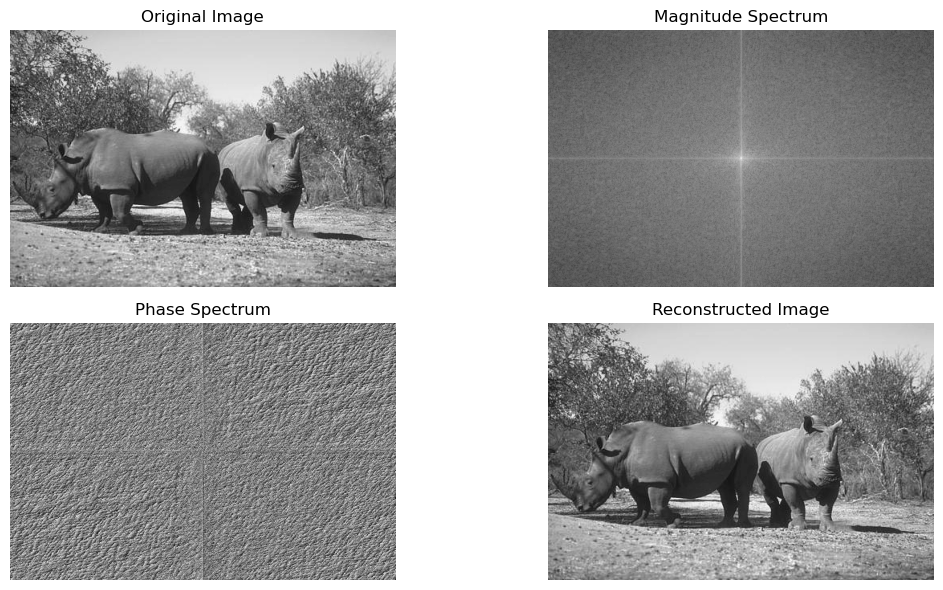

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the image and convert it to grayscale
img1 = cv2.imread('images/rhino.jpg', cv2.IMREAD_GRAYSCALE)
H, W = img1.shape

# (b) Perform FFT
dft = np.fft.fft2(img1,s=(H*2, W*2))
dft_shifted = np.fft.fftshift(dft)

# Calculate the magnitude and phase
magnitude = 20*np.log(np.abs(dft_shifted))
phase = np.angle(dft_shifted)

# (c) Perform IFFT
idft_shifted = np.fft.ifftshift(dft_shifted)
reconstructed_img = np.fft.ifft2(idft_shifted)

# Convert back to a real signal and take the absolute value
reconstructed_img = np.abs(reconstructed_img)[0:H, 0:W]

# (d) Display the images in the same figure with sub-figures
plt.figure(figsize=(12, 6))

# Sub-figure for original image
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sub-figure for magnitude spectrum
plt.subplot(2, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Sub-figure for phase angles
plt.subplot(2, 2, 3)
plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')


# Sub-figure for reconstructed image
plt.subplot(2, 2, 4)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### (2) Ideal Lowpass Filtering.	
(a) Load the image rhino.jpg. Convert it to grayscale.

(b) Perform FFT. 

(c) Design an ideal lowpass filter.

(d) Perform frequency domain filtering with the ideal lowpass filter.

(e) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

C:\Users\12737\AppData\Local\Temp\ipykernel_23280\3040000735.py:26: RuntimeWarning: divide by zero encountered in log
  filtered_magnitude_spectrum = 20*np.log(np.abs(filtered_dft_shifted))


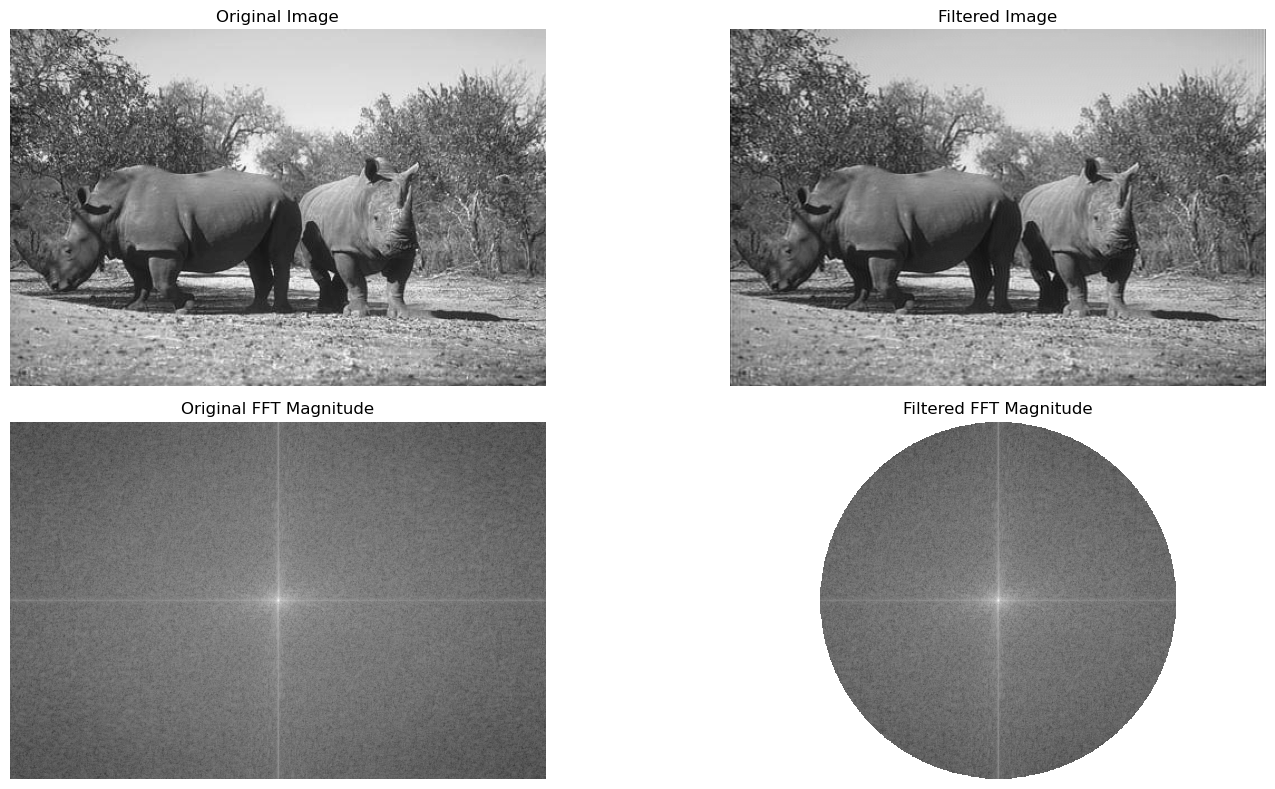

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the image and convert it to grayscale
img2 = cv2.imread('images/rhino.jpg', cv2.IMREAD_GRAYSCALE)
H, W = img2.shape
# (b) Perform FFT
dft = np.fft.fft2(img2,s=(H*2, W*2))
dft_shifted = np.fft.fftshift(dft)

# (c) Design an ideal lowpass filter
# Define the shape of the filter
filter_size = (dft_shifted.shape[0], dft_shifted.shape[1])
y, x = np.zeros(filter_size), np.zeros(filter_size)
for i in range(filter_size[0]):
    for j in range(filter_size[1]):
        if np.sqrt((i - filter_size[0] // 2) ** 2 + (j - filter_size[1] // 2) ** 2) <= filter_size[0] // 2:
            y[i, j], x[i, j] = 1, 1

# (d) Perform frequency domain filtering with the ideal lowpass filter
filtered_dft_shifted = dft_shifted * np.fft.fftshift(np.fft.ifftshift(y) * np.fft.ifftshift(x))
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_dft_shifted))
filtered_img = np.abs(filtered_img)[0:H, 0:W]

filtered_magnitude_spectrum = 20*np.log(np.abs(filtered_dft_shifted))
magnitude_spectrum = 20*np.log(np.abs(dft_shifted))

# (e) Display the images and their FFT magnitudes
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(2, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

# Original FFT magnitude
plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original FFT Magnitude')
plt.axis('off')

# Filtered FFT magnitude
plt.subplot(2, 2, 4)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')
plt.title('Filtered FFT Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

### (3) Gaussian Lowpass Filter.	
(a) Load the image lena.jpg. Convert it to grayscale.

(b) Perform FFT.

(c) Perform Gaussian lowpass filtering.

(d) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

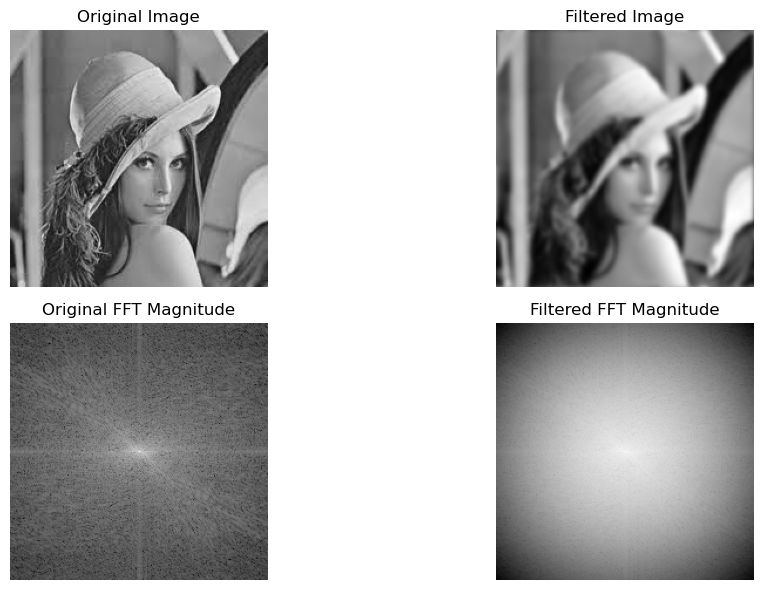

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the image and convert it to grayscale
img3 = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# (b) Perform FFT
dft = np.fft.fft2(img3)
dft_shifted = np.fft.fftshift(dft)

# (c) Perform Gaussian lowpass filtering
H, W = img3.shape
gaussian_kernel = np.zeros((H, W))
sigma = 17 

# Create Gaussian lowpass filter
for i in range(H):
    for j in range(W):
        gaussian_kernel[i, j] = np.exp(-(i - H//2)**2 / (2 * sigma**2) - (j - W//2)**2 / (2 * sigma**2))

# Apply Gaussian lowpass filter
gaussian_kernel /= np.sum(gaussian_kernel)  # normalization
filtered_dft_shifted = dft_shifted * gaussian_kernel

# (d) Perform inverse FFT and reconstruct the image
filtered_dft = np.fft.ifftshift(filtered_dft_shifted)
filtered_img = np.fft.ifft2(filtered_dft)
filtered_img = np.abs(filtered_img)  

magnitude = 20*np.log(np.abs(dft_shifted))
filtered_magnitude = 20*np.log(np.abs(filtered_dft_shifted))

# Display the images and their FFT magnitudes
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(2, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

# Original FFT magnitude
plt.subplot(2, 2, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Original FFT Magnitude')
plt.axis('off')

# Filtered FFT magnitude
plt.subplot(2, 2, 4)
plt.imshow(filtered_magnitude, cmap='gray')
plt.title('Filtered FFT Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

### (4) Butterworth Lowpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth lowpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$ are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth lowpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.


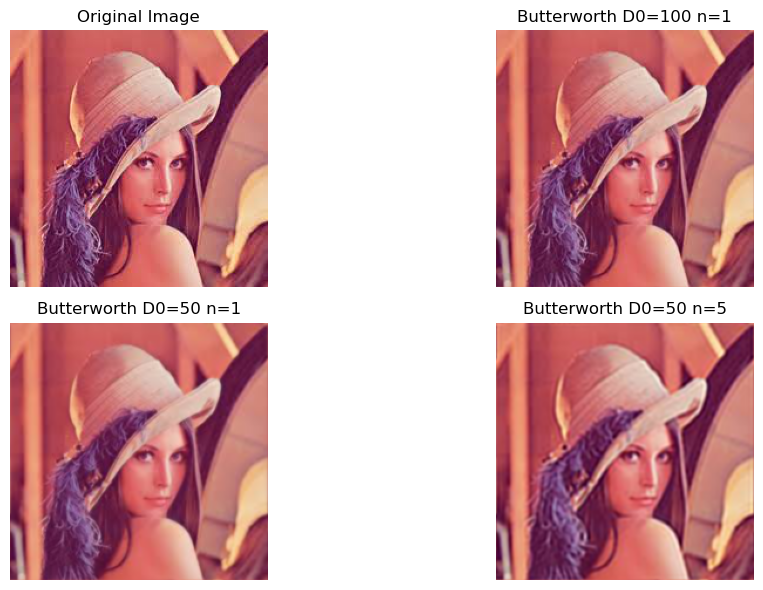

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Calculate Euclidean distance between two points
def cal_distance(center, point):
    return np.sqrt((center[0] - point[0])**2 + (center[1] - point[1])**2)

# Create Butterworth filter matrix
def make_transform_matrix(d, n, size):
    transform_matrix = np.zeros(size, dtype=np.float32)
    #  Calculate precise center coordinates
    center = ((size[0]-1)/2, (size[1]-1)/2)
    for i in range(size[0]):
        for j in range(size[1]):
            dis = cal_distance(center, (i, j))
            # Butterworth filter formula
            transform_matrix[i, j, :] = 1 / (1 + (dis/d)**(2*n))
    return transform_matrix

# (a) Load the image
img4 = np.array(Image.open('images/lena.jpg').convert('RGB'))
H, W, _ = img4.shape

# (b) FFT for each channel
fft_image = np.fft.fftshift(np.fft.fft2(img4, axes=(0, 1)), axes=(0, 1))

# (c) Create three filters
def process_filter(fft_data, matrix):
    # 频域滤波 | Frequency domain filtering
    filtered = fft_data * matrix
    # 逆变换处理 | Inverse transform processing
    ifft_result = np.fft.ifft2(np.fft.ifftshift(filtered, axes=(0,1)), axes=(0,1))
    # 取实部并确保数值范围 | Take real part and ensure value range
    return np.clip(np.real(ifft_result), 0, 255).astype(np.uint8)

# Apply filters with different parameters
image_d50_n1 = process_filter(fft_image, make_transform_matrix(100, 1, fft_image.shape))
image_d25_n1 = process_filter(fft_image, make_transform_matrix(50, 1, fft_image.shape))
image_d25_n5 = process_filter(fft_image, make_transform_matrix(50, 5, fft_image.shape))

# (f) 显示结果 | (f) Display results
plt.figure(figsize=(12, 6))

# Show original image
plt.subplot(2, 2, 1)
plt.imshow(img4)
plt.title('Original Image')
plt.axis('off')

# Show first filter result
plt.subplot(2, 2, 2)
plt.imshow(image_d50_n1)
plt.title('Butterworth D0=100 n=1')
plt.axis('off')

# Show second filter result
plt.subplot(2, 2, 3)
plt.imshow(image_d25_n1)
plt.title('Butterworth D0=50 n=1')
plt.axis('off')

# Show third filter result
plt.subplot(2, 2, 4)
plt.imshow(image_d25_n5)
plt.title('Butterworth D0=50 n=5')
plt.axis('off')

plt.tight_layout()
plt.show()

### (5) Butterworth Highpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth highpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$  are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth highpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.

C:\Users\12737\AppData\Local\Temp\ipykernel_23280\1328095392.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(image_d50_n1.astype(np.uint8))
C:\Users\12737\AppData\Local\Temp\ipykernel_23280\1328095392.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(image_d25_n1.astype(np.uint8))
C:\Users\12737\AppData\Local\Temp\ipykernel_23280\1328095392.py:69: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(image_d25_n5.astype(np.uint8))


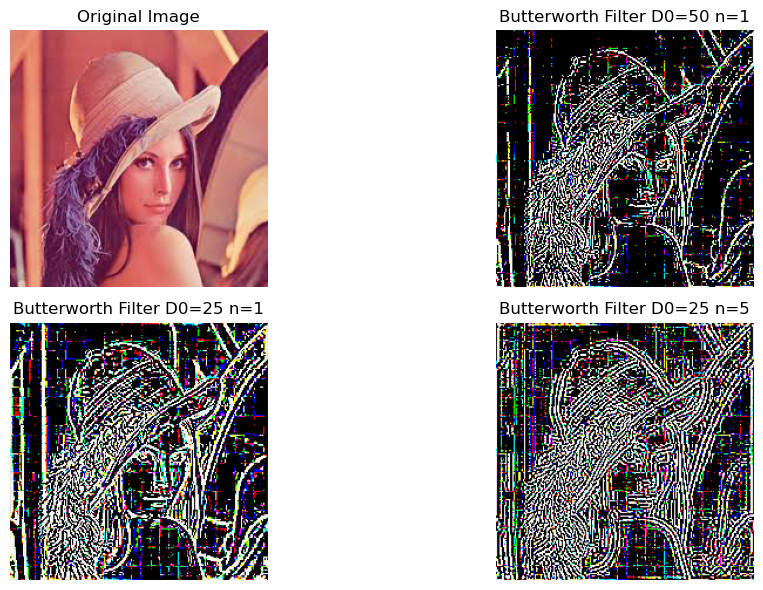

In [5]:
import cv2 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def cal_distance(center, point):
    return np.sqrt((center[0] - point[0])**2 + (center[1] - point[1])**2)

def make_transform_matrix(d, n, size):
    transform_matrix = np.zeros(size, dtype=np.float32 )
    center = (int(size[0]-1)/2, int(size[1]-1)/2)
    for i in range(size[0]):
        for j in range(size[1]):
            dis = cal_distance(center, (i, j))
            transform_matrix[i, j, :] = 1 / (1+(dis/d)**(2*n))
    return transform_matrix

def make_highpass_transform_matrix(d, n, size):
    # create a transform matrix of low pass Butterworth filter
    lowpass_matrix = make_transform_matrix(d, n, size)
    # The transfer matrix of the low-pass filter is then subtracted from 1 to obtain the transfer matrix of the high-pass filter
    highpass_matrix = np.ones_like(lowpass_matrix) - lowpass_matrix
    return highpass_matrix


# (a) Load the RGB image lena.jpg.
img4 = np.array(Image.open('images/lena.jpg').convert('RGB'))
H, W, _= img4.shape

# (b) Perform FFT on each channel separately.
fft_image = np.fft.fftshift(np.fft.fft2(img4, axes=(0, 1)),axes=(0,1))

# (c) Design three Butterworth lowpass filters with different cutoff frequencies D0 and orders n.
matrix50_1 = make_highpass_transform_matrix(100, 1, fft_image.shape)
matrix25_1 = make_highpass_transform_matrix(50, 1, fft_image.shape)
matrix25_5 = make_highpass_transform_matrix(50, 5, fft_image.shape)

# apply high pass filters
fft_image_50_1 = fft_image * matrix50_1
image_d50_n1 = np.fft.ifft2(np.fft.ifftshift(fft_image_50_1, axes=(0, 1)), axes=(0, 1))

fft_image_25_1 = fft_image * matrix25_1
image_d25_n1 = np.fft.ifft2(np.fft.ifftshift(fft_image_25_1, axes=(0, 1)), axes=(0, 1))

fft_image_25_5 = fft_image * matrix25_5
image_d25_n5 = np.fft.ifft2(np.fft.ifftshift(fft_image_25_5, axes=(0, 1)), axes=(0, 1))

# (f) Display the original image and the filtered images in the same figure with sub-figures.
plt.figure(figsize=(12, 6))

# Display the original image.
plt.subplot(2, 2, 1)
plt.imshow(img4)  # Convert RGB to BGR for OpenCV
plt.title('Original Image')
plt.axis('off')

# Display the filtered images.
plt.subplot(2, 2, 2)
plt.imshow(image_d50_n1.astype(np.uint8)) 
plt.title('Butterworth Filter D0=50 n=1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_d25_n1.astype(np.uint8)) 
plt.title('Butterworth Filter D0=25 n=1')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_d25_n5.astype(np.uint8))  
plt.title('Butterworth Filter D0=25 n=5')
plt.axis('off')

plt.tight_layout()
plt.show()

### (6) Adaptive Median Filter. 
(a) Load the grayscale image noisy_salt_pepper.png. 

(b) Use ADAPTIVE median filter for denoising (write code based on the implementation principle of adaptive median filter).

(c) Display the original image and the filtered images in the same figure with sub-figures. Add the corresponding title to the sub-figures.


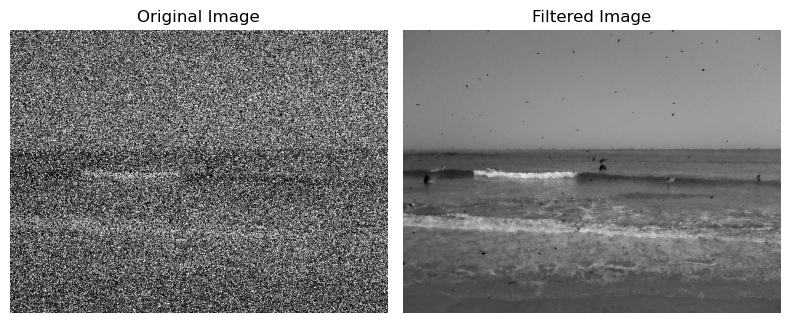

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the grayscale image
img6 = cv2.imread('images/noisy_salt_pepper.png', cv2.IMREAD_GRAYSCALE)

def adaptive_median_filter(image, k):
    h, w = image.shape
    output = np.zeros(image.shape, image.dtype)
    
    for i in range(h):
        for j in range(w):
            # Define a window around the pixel
            window = image[max(0, i-k):min(h, i+k+1), max(0, j-k):min(w, j+k+1)]
            # If the pixel is a noise pixel (you can define a method to determine this)
            if image[i,j]==0 or image[i,j]==255:
                output[i, j] = np.median(window)
            else:
                output[i, j] = image[i, j]
    
    return output



# (b) Use adaptive median filter for denoising
k = 3  # Size of the window (must be an odd number)
filtered_image = adaptive_median_filter(img6, k)

# (c) Display the original image and the filtered images in the same figure with sub-figures
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(img6, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### (7) Motion Blur, Inverse filtering and Wiener filtering.	
(a) Load the RGB image lena.jpg.

(b) Apply motion blur to it.

(c) Recovering images by using inverse filtering and Wiener filtering, respectively. (Note that when using color images, pay attention to the <font style="color:red;">axes</font> parameters of functions such as fft, ifft, fftshift and ifftshift)

(d) Add noise to the blurred image, and then use Inverse filtering and Wiener filtering to recovere the image, respectively.

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figures.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


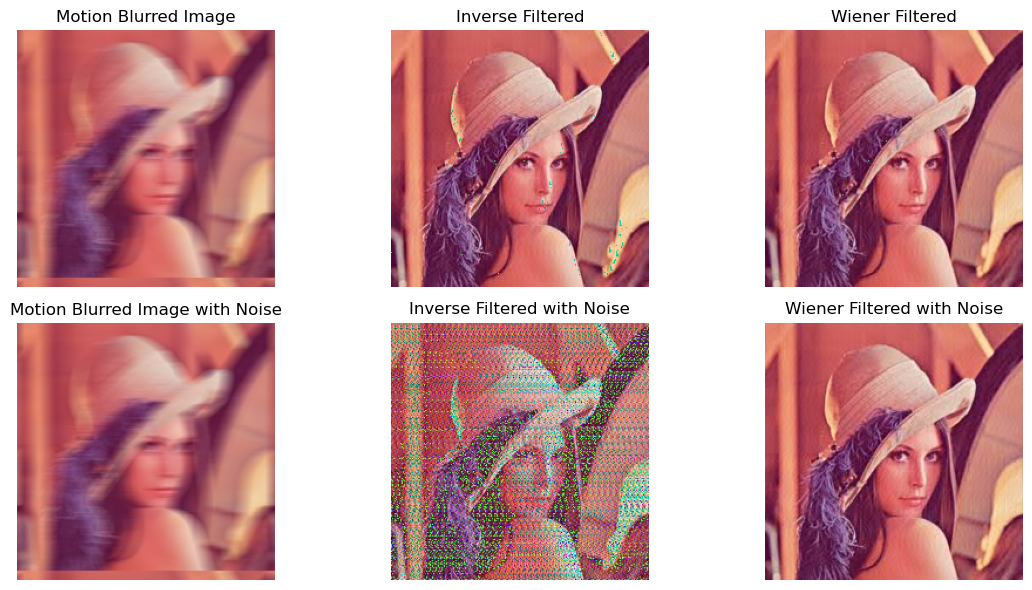

In [7]:
import cv2
import numpy as np
import numpy.fft as fp
from skimage.restoration import unsupervised_wiener
import matplotlib.pyplot as plt

def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

def motion_blur(kernel_size, angle):
    # Create a line-shaped structural element with 1s in the horizontal direction and 0s elsewhere
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, 1))
    # Use the warpAffine function to rotate the structural element
    M = cv2.getRotationMatrix2D((kernel_size, kernel_size // 2), angle, 1)
    rotated_kernel = cv2.warpAffine(vertical_kernel, M, (kernel_size, kernel_size), flags=cv2.INTER_LINEAR)
    # Flatten the rotated kernel and normalize it so that the sum is 1
    flat_kernel = rotated_kernel.flatten()
    flat_kernel = flat_kernel / np.sum(flat_kernel)
    # Convert the one-dimensional kernel back into a two-dimensional kernel
    kernel = flat_kernel.reshape((kernel_size, kernel_size))
    return kernel

# (a) Load the RGB image lena.jpg
image = cv2.imread('images/lena.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# (b) Apply motion blur to it
kernel_size = 15
angle = 0 
epsilon = 10e-6 
kernel = motion_blur(kernel_size, angle)

kernel = np.pad(kernel, (((image.shape[0]-kernel_size)//2,(image.shape[0]-kernel_size)//2+1), ((image.shape[1]-kernel_size)//2,(image.shape[1]-kernel_size)//2+1)), padwithzeros)
kernel_padded = np.zeros(image.shape)
for i in range(0,3):
    kernel_padded[:, :, i] = kernel

freq_shift = fp.fft2(image, axes=(0,1))
freq_kernel = fp.fft2(fp.ifftshift(kernel_padded, axes=(0,1)), axes=(0,1))
blurred_image = fp.ifft2(freq_shift*freq_kernel, axes=(0,1)).real

# (c) Recovering images by using inverse filtering and Wiener filtering, respectively

freq = fp.fft2(blurred_image, axes=(0,1))
freq_kernel2 =  1 / (epsilon + freq_kernel)
restored_inv_filter = fp.ifft2(freq*freq_kernel2, axes=(0,1)).real
restored_inv_filter = restored_inv_filter.astype(np.uint8)

psf = np.copy(kernel)  # Point Spread Function (PSF) is the same as the motion blur kernel
restored_wiener = np.zeros(image.shape)
for channel in range(image.shape[2]):
    restored_wiener[:, :, channel] = unsupervised_wiener(blurred_image[:, :, channel] / 255.0, psf)[0]
    
restored_wiener = (restored_wiener*255).astype(np.uint8)
    
# (d) Add noise to the blurred image, and then use Inverse filtering and Wiener filtering to recover the image, respectively
blurred_image_with_noise = blurred_image + 0.00005 * blurred_image.std() * np.random.standard_normal(blurred_image.shape)

freq = fp.fft2(blurred_image_with_noise, axes=(0,1))
restored_inv_filter_noise = fp.ifft2(freq*freq_kernel2, axes=(0,1)).real

restored_wiener_noise = np.zeros(blurred_image_with_noise.shape)
for channel in range(blurred_image_with_noise.shape[2]):
    restored_wiener_noise[:, :, channel] = unsupervised_wiener((blurred_image_with_noise[:, :, channel] / 255.0), psf)[0]
    
blurred_image  = blurred_image .astype(np.uint8)    
blurred_image_with_noise = blurred_image_with_noise.astype(np.uint8)
restored_inv_filter_noise = restored_inv_filter_noise.astype(np.uint8)

# (e) Display them in the same figure with sub-figures
plt.figure(figsize=(12, 6))

# Display the filtered images.
plt.subplot(2, 3, 1)
plt.imshow(blurred_image) 
plt.title('Motion Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(restored_inv_filter) 
plt.title('Inverse Filtered')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(restored_wiener)  
plt.title('Wiener Filtered')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(blurred_image_with_noise)  
plt.title('Motion Blurred Image with Noise')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(restored_inv_filter_noise)  
plt.title('Inverse Filtered with Noise')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(restored_wiener_noise)  
plt.title('Wiener Filtered with Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

### (8) Estimating Noise Parameters (Bonus Task)    
(a) Load the grayscale images noisy_1.png and noisy_2.png respectively.

(b) Select a smooth region in each image and compute the histogram to estimate the noise distribution. Please specify the noise type.

(c) Display the image and the histograms in sub-figures. Add the corresponding title.

(d) Use moment estimation to estimate the noise parameters.

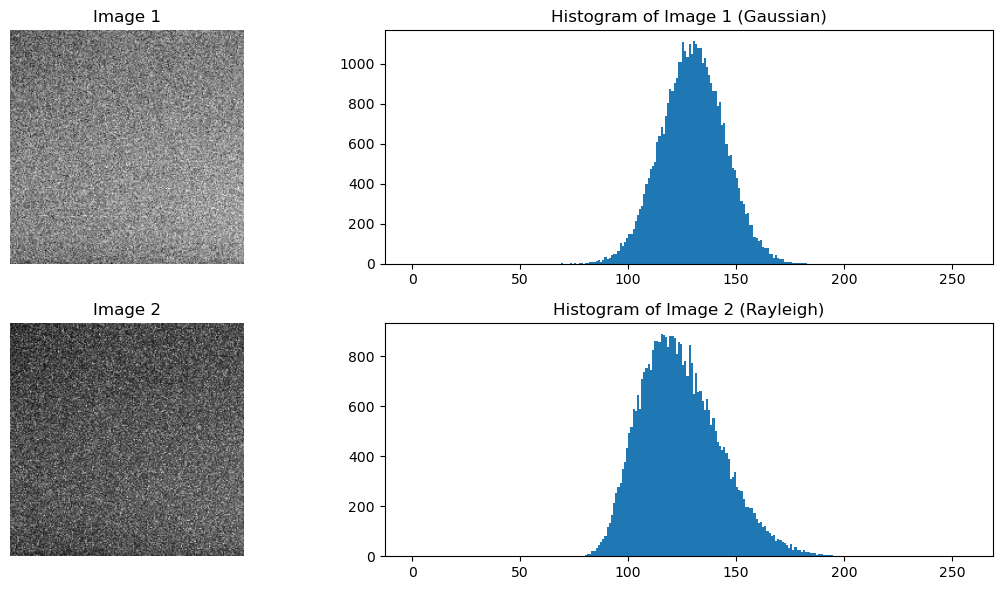

Noise parameters for Image 1: Mean = 129.387025, Variance = 214.45783664937503
Noise parameters for Image 2: Mean = 123.876025, Variance = 342.220355199375


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load the images
image1 = cv2.imread('images/noisy_1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/noisy_2.png', cv2.IMREAD_GRAYSCALE)

# (b) Select a smooth region and compute the histogram
# Here we choose the top-left corner of the image as the smooth region for the example
roi1 = image1[0:200, 0:200]  # Select a smooth region from Image 1
roi2 = image2[0:200, 0:200]  # Select a smooth region from Image 2

# (c) Display the images and their histograms in subplots
plt.figure(figsize=(12, 6))

# Display Image 1 and its histogram
plt.subplot(2, 2, 1)
plt.imshow(roi1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(roi1.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Image 1 (Gaussian)')

# Display Image 2 and its histogram
plt.subplot(2, 2, 3)
plt.imshow(roi2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(roi2.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Image 2 (Rayleigh)')

# Show all the plots
plt.tight_layout()
plt.show()

# (d) Estimate the noise parameters using moment estimation
# Here we use the first and second moments to estimate the mean and variance of the noise
mean1 = np.mean(roi1)
var1 = np.var(roi1)
mean2 = np.mean(roi2)
var2 = np.var(roi2)

print(f"Noise parameters for Image 1: Mean = {mean1}, Variance = {var1}")
print(f"Noise parameters for Image 2: Mean = {mean2}, Variance = {var2}")

# Based on the values of the moments, we can speculate about the type of noise. 
#If the noise's mean is close to 0 and the variance is finite, then the noise is likely to be Gaussian.

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.